<a href="https://colab.research.google.com/github/ayanokoji024/friendly-potato/blob/main/Iris_Dataset_ML_Lab_Assignment_1_020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [37]:
# Imports
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

### Loading Iris dataset and storing it in a panda dataframe

In [38]:
iris = load_iris()
# print(iris)

df = pd.DataFrame(iris.data, columns= iris.feature_names)
df['target'] = iris.target # ground class stored in 'target' column/field of the dataframe
# 'setosa' == 0, 'versicolor' == 1, 'virginica' == 2

print(df)
print(iris.feature_names)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

### Splitting the dataset into training and testing datasets

In [39]:
features = iris.feature_names # ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

X = df[features]
y = df['target']

# now we can split the dataset into training and testing dataset according to any ratio as per the 'train_test_split' function of sklearn.model_selection module:
# train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = 0.2)
# since we have to use the same piece of code again and again (except for different parameters),
# a function can be defined for calculating the various measures of the decision tree model for the sake of code re-usability

def decision_tree_model_iris(test_ratio, X, y, criterion_string="entropy"):


  train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = test_ratio)
  decision_tree_model = DecisionTreeClassifier(random_state=0, max_depth = 4, criterion=criterion_string)
  decision_tree_model.fit(train_X, train_y)

  pred_y = decision_tree_model.predict(test_X)
  print("Classification report for decision tree model:\n")
  print(classification_report(y_true = test_y, y_pred=pred_y))
  cm = confusion_matrix(test_y, pred_y)
  print(cm)

  fig, ax = plt.subplots(figsize=(8, 6))
  cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree_model.classes_))
  cm_display.plot(ax=ax, cmap='YlGn', values_format='d')

  # Add a title and labels
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Label')
  ax.set_ylabel('True Label')

  # Adjust the layout to avoid overlapping
  plt.tight_layout()
  # Show the Confusion Matrix
  plt.show()

  # Create a figure and axis for the decision tree plot
  fig, ax = plt.subplots(figsize=(12, 8))

  # Plot the decision tree
  tree.plot_tree(decision_tree_model, feature_names=features, class_names=['setosa','versicolor','virginica'], filled=True, rounded=True, ax=ax)

  # Add a title
  ax.set_title('Decision Tree Plot')

  # Adjust the layout to avoid overlapping
  plt.tight_layout()

  # Show the decision tree plot
  plt.show()

For test-train ratio of 0.2 to 0.8
Classification report for decision tree model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.83      1.00      0.91        10
           2       1.00      0.86      0.92        14

    accuracy                           0.93        30
   macro avg       0.94      0.95      0.94        30
weighted avg       0.94      0.93      0.93        30

[[ 6  0  0]
 [ 0 10  0]
 [ 0  2 12]]


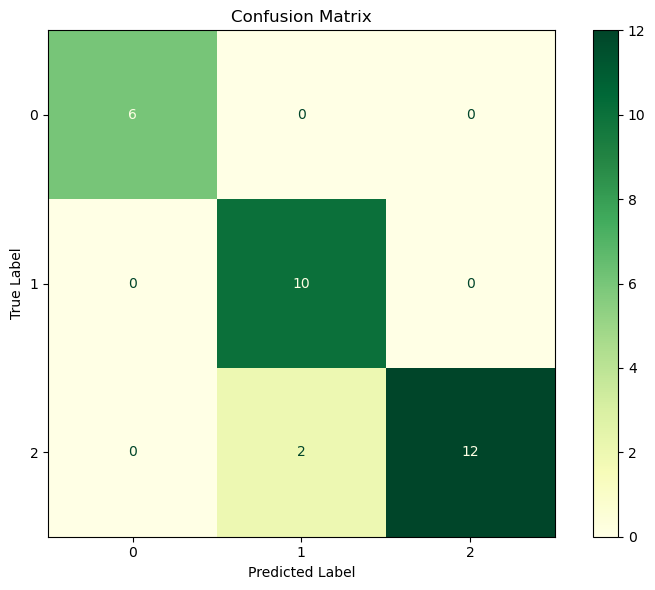

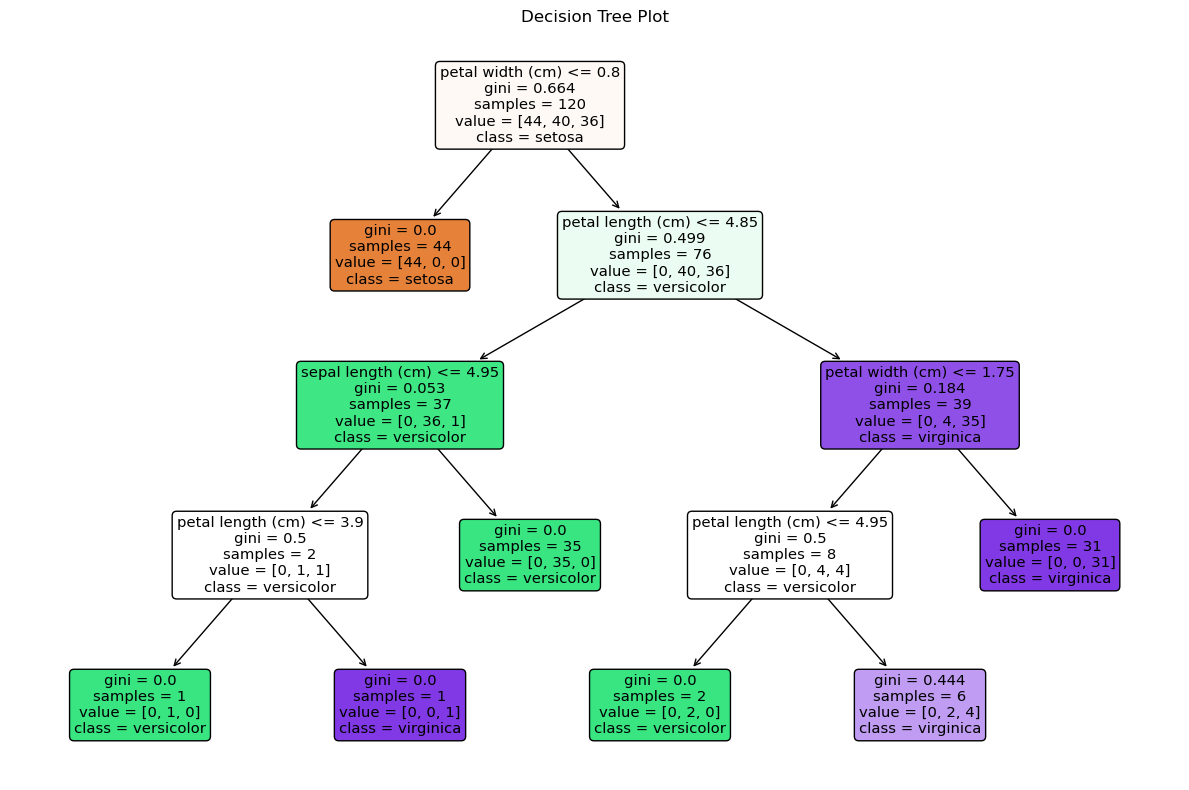

In [40]:
print("For test-train ratio of 0.2 to 0.8")
decision_tree_model_iris(0.2,X,y,"gini")



For test-train ratio of 0.3 to 0.7
Classification report for decision tree model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.82      1.00      0.90        14
           2       1.00      0.84      0.91        19

    accuracy                           0.93        45
   macro avg       0.94      0.95      0.94        45
weighted avg       0.95      0.93      0.93        45

[[12  0  0]
 [ 0 14  0]
 [ 0  3 16]]


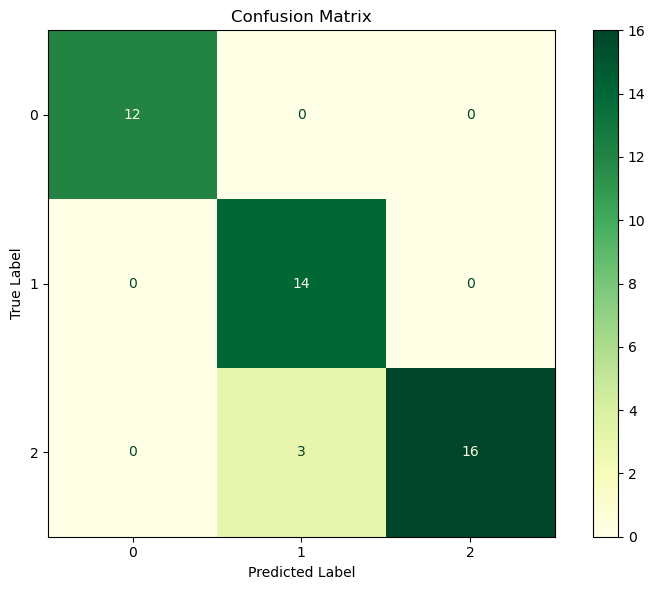

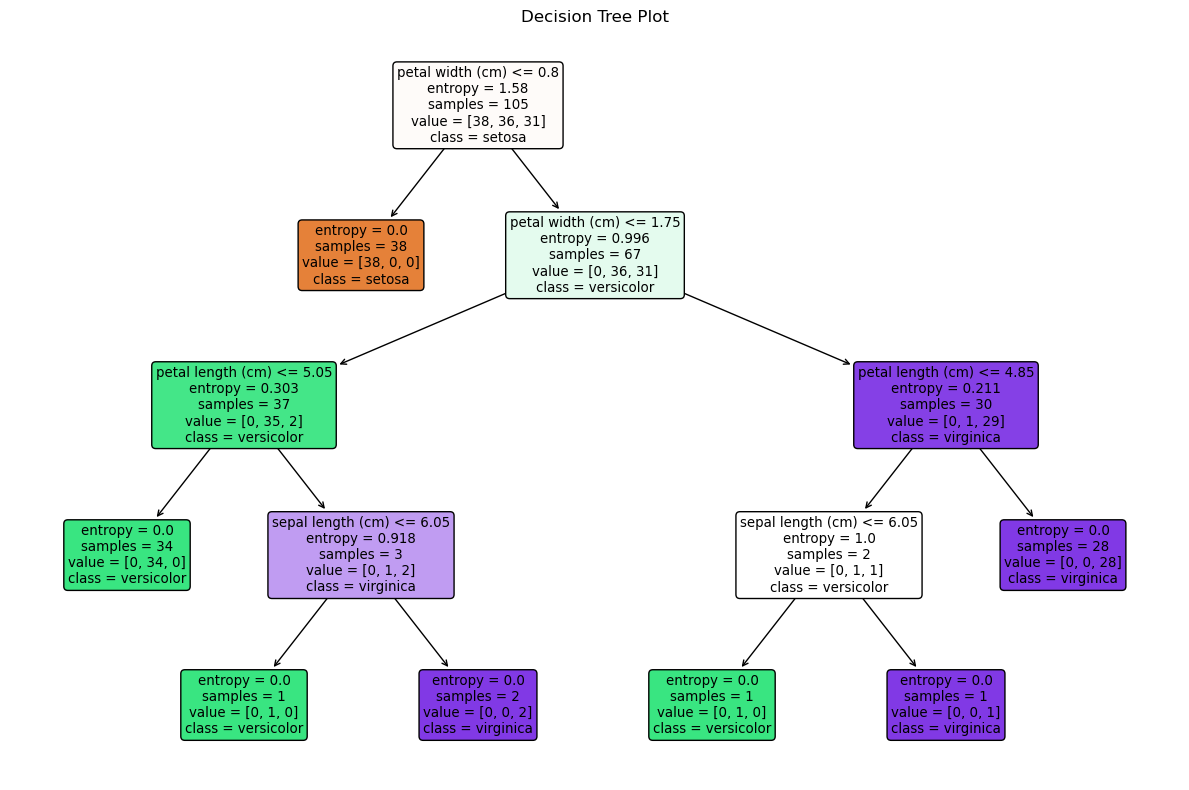

In [41]:
print("\nFor test-train ratio of 0.3 to 0.7")
decision_tree_model_iris(0.3,X,y)



For test-train ratio of 0.4 to 0.6
Classification report for decision tree model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.96      0.96      0.96        24
           2       0.95      0.95      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

[[16  0  0]
 [ 0 23  1]
 [ 0  1 19]]


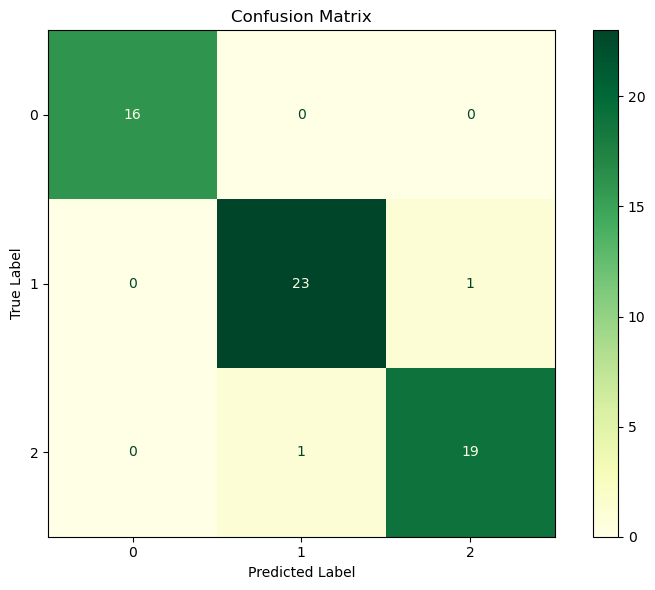

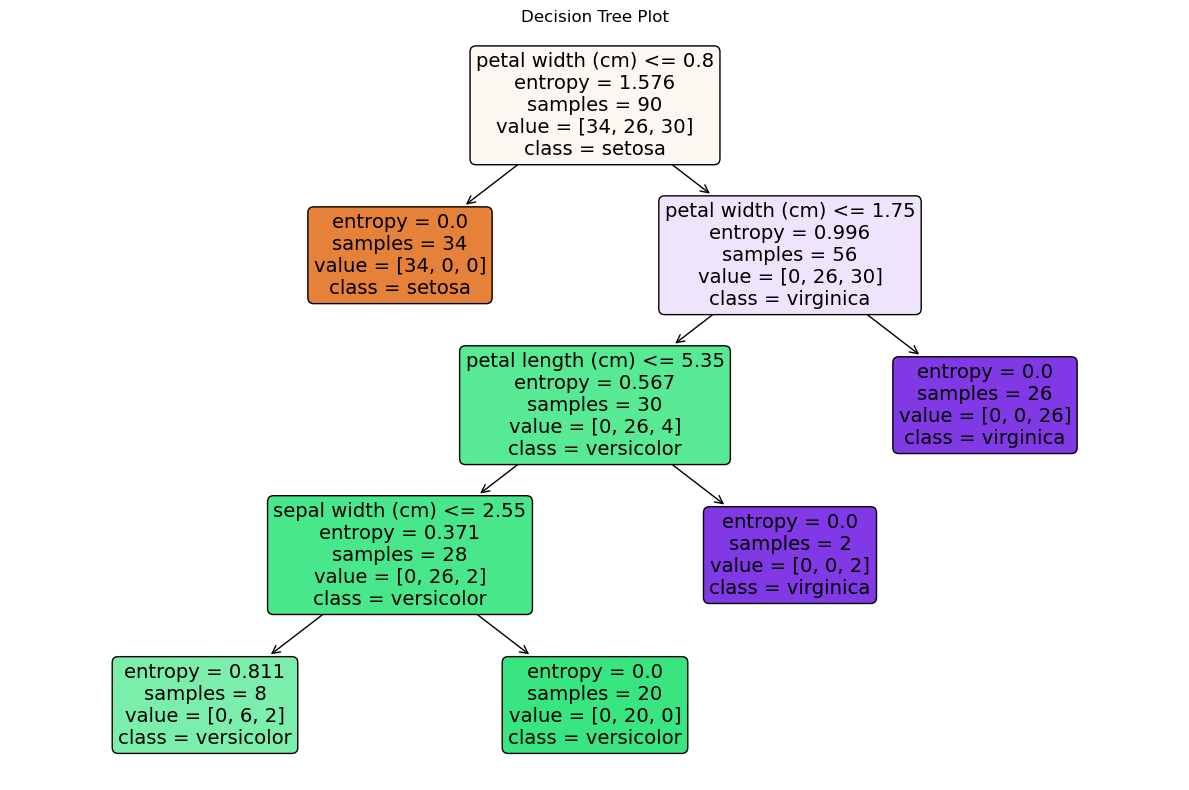

In [42]:
print("\nFor test-train ratio of 0.4 to 0.6")
decision_tree_model_iris(0.4,X,y)

### Naive Bayes

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

def multinomialNB_model_iris(test_ratio, X, y):
  train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = test_ratio)
  model = MultinomialNB()
  model.fit(train_X, train_y)

  pred_y = model.predict(test_X)
  print("Classification report for decision tree model:\n")
  print(classification_report(y_true = test_y, y_pred=pred_y))
  cm = confusion_matrix(test_y, pred_y)
  print(cm)

  fig, ax = plt.subplots(figsize=(8, 6))
  cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_))
  cm_display.plot(ax=ax, cmap='YlGn', values_format='d')

  # Add a title and labels
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Label')
  ax.set_ylabel('True Label')

  # Adjust the layout to avoid overlapping
  plt.tight_layout()
  # Show the Confusion Matrix
  plt.show()

def gaussianNB_model_iris(test_ratio, X, y, smooth = 1e-9):
  train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = test_ratio)
  model = GaussianNB(var_smoothing=smooth)
  model.fit(train_X, train_y)

  pred_y = model.predict(test_X)
  print("Classification report for decision tree model:\n")
  print(classification_report(y_true = test_y, y_pred=pred_y))
  cm = confusion_matrix(test_y, pred_y)
  print(cm)

  fig, ax = plt.subplots(figsize=(8, 6))
  cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_))
  cm_display.plot(ax=ax, cmap='YlGn', values_format='d')

  # Add a title and labels
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Label')
  ax.set_ylabel('True Label')

  # Adjust the layout to avoid overlapping
  plt.tight_layout()
  # Show the Confusion Matrix
  plt.show()

def bernoulliNB_model_iris(test_ratio, X, y):
  train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = test_ratio)
  scaler = StandardScaler()
  train_X = scaler.fit_transform(train_X)
  test_X = scaler.transform(test_X)

  model = BernoulliNB()
  model.fit(train_X, train_y)
  model = BernoulliNB()
  model.fit(train_X, train_y)

  pred_y = model.predict(test_X)
  print("Classification report for decision tree model:\n")
  print(classification_report(y_true = test_y, y_pred=pred_y))
  cm = confusion_matrix(test_y, pred_y)
  print(cm)

  fig, ax = plt.subplots(figsize=(8, 6))
  cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_))
  cm_display.plot(ax=ax, cmap='YlGn', values_format='d')

  # Add a title and labels
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Label')
  ax.set_ylabel('True Label')

  # Adjust the layout to avoid overlapping
  plt.tight_layout()
  # Show the Confusion Matrix
  plt.show()

Classification report for decision tree model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[21  0  0]
 [ 0 12  0]
 [ 0  0 12]]


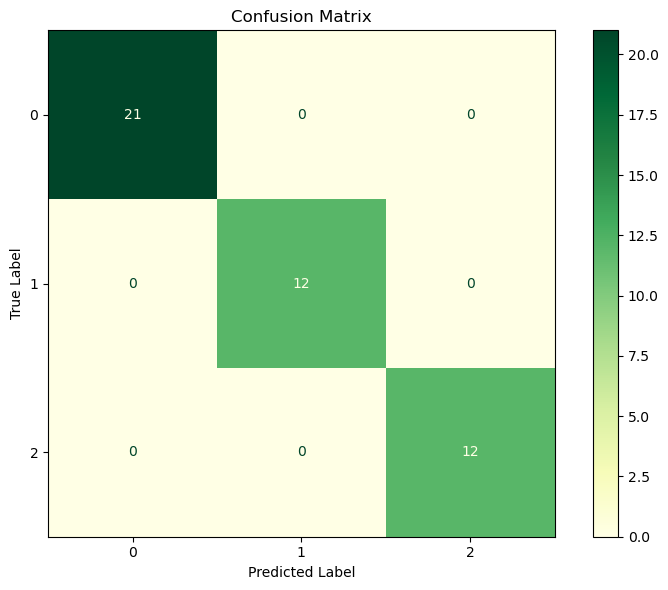

In [54]:
multinomialNB_model_iris(0.3,X,y)

Classification report for decision tree model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      0.88      0.90        16
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45

[[14  0  0]
 [ 0 14  2]
 [ 0  1 14]]


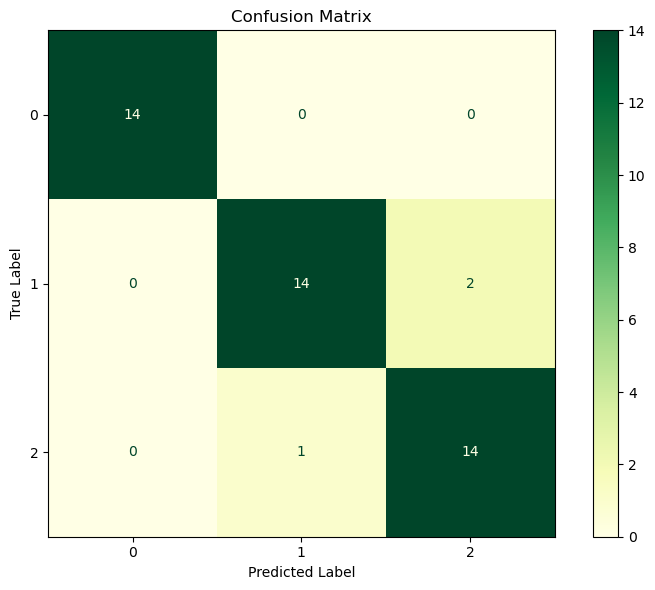

In [55]:
gaussianNB_model_iris(0.3,X,y)

Classification report for decision tree model:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.00      0.00      0.00        16
           2       0.24      1.00      0.39        11

    accuracy                           0.24        45
   macro avg       0.08      0.33      0.13        45
weighted avg       0.06      0.24      0.10        45

[[ 0  0 18]
 [ 0  0 16]
 [ 0  0 11]]


C:\Users\ANOMITRO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANOMITRO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANOMITRO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


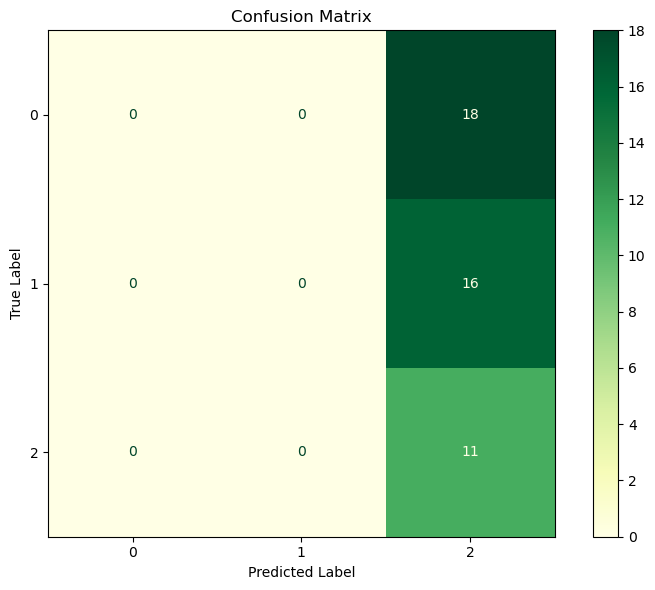

In [62]:
bernoulliNB_model_iris(0.3,X,y)